In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import scipy.linalg as la
from IPython.display import HTML
%matplotlib inline

# Exercício 1

Analisamos a função de onda

$$ \frac{\partial^{2} \psi(x, t)}{\partial t^{2}}=c^{2} \frac{\partial^{2} \psi(x, t)}{\partial x^{2}} $$

decompondo em

$$ \frac{\partial \phi}{\partial t}=c^{2} \frac{\partial^{2} \psi}{\partial x^{2}}$$

$$ \frac{\partial \psi}{\partial t}=\phi$$

Implicitamente

$$ \psi_{i}(t+ h)-\psi_{i}(t)= h \phi_{i}(t+ h) $$

$$ \phi_{i}(t+h)-\phi_{i}(t)=\frac{c^{2} h}{a^{2}}\left(\psi_{i+1}(t+h)+\psi_{i-1}(t+h)-2 \psi_{i}(t+h)\right)$$

Substituíndo $\phi_i(t+h)$ na primeira equação obtemos

$$ \psi_i(t+h) \left( 1 + 2 \gamma^2 \right) - \gamma^2 \left[ \psi_{i-1} (t + h) + \psi_{i+1} (t + h) \right] = \psi_i(t) + h \phi_i (t) $$

Já substituindo $\psi_j(t + h)$ para $j \in \{i-1, i, i + 1\}$

$$ \phi_i(t+h) \left( 1 + 2\gamma^2 \right) - \gamma^2 \left[ \phi_{i-1} (t + h) + \phi_{i+1} (t + h) \right] = \phi_i(t) + { \gamma ^2}{h} [ \psi_{i-1}(t) + \psi_{i+1}(t) - 2\psi_i(t)]$$

com $\gamma = \frac{ch}{a}$.

Destas relações obtemos sistemas da forma

$$\mathbf{A} \mathbf{\psi}(t + h) = \mathbf{b}^\psi (t)$$
$$\mathbf{A} \mathbf{\phi}(t + h) = \mathbf{b}^\phi (t)$$


Sendo $\mathbf{A}$ de tridiagonal de elementos

$$ A_{i,i} = 1 + 2 \gamma ^2 \quad e \quad A_{i-1, j} = A_{i+1, j}= -\gamma ^2$$

e

$$ b^\psi_i = \psi_i(t) + h \phi_i(t) \quad e \quad b^\phi_i = \phi_i(t) + \frac{\gamma^ 2}{h} [\psi_{i-1}(t) + \psi_{i+1}(t) - 2\psi_i(t)]$$

## 1 
### a)
Por análise de Von Neumann obtemos o sistema:

$$ c_k^\psi(t+h) \left[ 1 + 4 \sin^2 \left( \frac{ka}{2} \right) \right] = c_k^\psi(t) + h c_k^\phi(t) $$

$$ c_k^\phi(t+h) \left[ 1 + 4 \sin^2 \left( \frac{ka}{2} \right) \right] = c_k^\phi(t) - \frac{\gamma}{h} \left[ 1 + 4 \sin^2 \left( \frac{ka}{2} \right) \right] c_k^\phi(t) $$

cuja matriz correspondente é

$$ \mathbf{A} = \frac{1}{1 + 4\sin^2 \left( \frac{ka}{2} \right)} \left( \matrix{
1 & h \cr
-4 \frac{\gamma}{h} \sin^2 \left( \frac{ka}{2} \right) & 1} \right)$$

cujos valores próprios são tal que

$$ | \lambda | = \frac{1}{\sqrt{1 + 4 \gamma ^2 \sin^2 \left( \frac{ka}{2} \right)}} $$

Daqui concluímos imediatamente que o nosso método é estável, ainda que possa ter um módulo muito menor que $1$, o que não é ideal. No caso $k = 0$, o nosso método tem valores próprios de $1$, podendo então ser usado sem especiais cuidados.

### b)

In [3]:
a = .005
h = .1 * a
M = int(1 // a)
diag = 1 + 2 * h**2 / a ** 2
diag_m = np.ones(M, float) * diag
ndiag = - h**2 / a ** 2
ndiag_m = np.ones(M-1, float) * ndiag
A = np.diag(diag_m) + np.diag(ndiag_m, k = 1) + np.diag(ndiag_m, k=-1)
l, v = la.eig(A)
print(np.absolute(1/l))

[0.96154074 0.96154759 0.96155899 0.96157495 0.96159547 0.96162053
 0.96165014 0.96168429 0.96172297 0.96176617 0.96181389 0.9618661
 0.96192281 0.96198399 0.96204964 0.96211975 0.96219428 0.96227324
 0.96235659 0.96244433 0.96253644 0.96273366 0.96263289 0.96342775
 0.96330154 0.96317951 0.96306168 0.96294808 0.96397376 0.96369258
 0.96355811 0.96412041 0.96427105 0.96442566 0.96458419 0.9647466
 0.96491288 0.96598933 0.96580074 0.96561577 0.96543445 0.96525684
 0.96283873 0.9661815  0.96806456 0.9663772  0.96784224 0.96762309
 0.96740714 0.96719445 0.96698506 0.96677903 0.96383114 0.96898436
 0.96874993 0.96851845 0.96922168 0.96946185 0.9697048  0.96995049
 0.97044983 0.97070337 0.97121789 0.97147875 0.97174193 0.97200737
 0.97392344 0.97364395 0.97336627 0.97309048 0.97281663 0.99999753
 0.99999013 0.9999778  0.97420467 0.97534574 0.97505819 0.9756347
 0.975925   0.97621657 0.97650934 0.97769102 0.97739415 0.97798874
 0.97828722 0.99996054 0.99993835 0.99991125 0.99987923 0.9998005

Confirmamos assim que temos valores próprios são ligeiramente inferiores a 1. Os vetores próprios são funções sinusoidais, tal como esperado

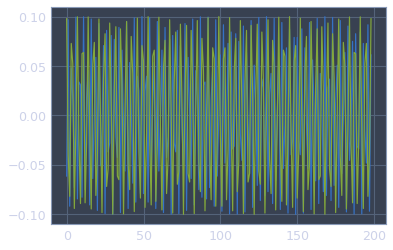

In [4]:
plt.plot(v[:, 40])
plt.plot(v[:, 80])
plt.show()

### c)
Escrevemos um algoritmo para resolução de sistema lineares com matrizes tridiagonais do tipo apresentado neste problema

In [5]:
def LU_tridiag(a, b, f): #lower and upper | diag | result vector
    n = len(f)
    u = np.zeros(n, float)
    l = np.zeros(n-1, float)
    v = np.zeros(n, float)
    y = np.zeros(n, float)
    v[0], y[0] = b, f[0]
    for i in range(1, n):
        l[i-1] = a / v[i-1]
        v[i] = b - l[i-1] * a
        y[i] = f[i] - l[i-1] * y[i-1]
    u[n-1] = y[n-1]/v[n-1]
    for i in range(n-2, -1, -1):
        u[i] = (y[i] - a * u[i+1]) / v[i]
    return u

Resolvemos iterativamente o sistema com condições iniciais

$$\psi(x, 0)=\frac{e^{-\frac{(x-L / 2)^{2}}{2 \sigma^{2}}}}{\sqrt{2 \pi \sigma^{2}}}$$
$$\phi(x, 0)=0$$

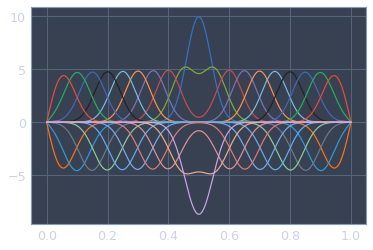

In [15]:
a = .005
h = .1 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, 1 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    f1 = psi[1:-1] + h * phi[1:-1]
    f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2 *psi[1:-1])
    psis[1:-1,i] = LU_tridiag(ndiag, diag, f1)
    phis[1:-1,i] = LU_tridiag(ndiag, diag, f2)
    psis[0,i], psis[-1, i], phis[0, i], phis[-1,i] = 0., 0., 0., 0.
for j in range(0,len(ts),100):
    plt.plot(x, psis[:, j])
plt.show()

### d)
Para o método de Gauss-Seidel temos a fórmula

$$ \psi_i(t + h) = \frac{1}{A_{i,i}}\left( b_i^\psi - \sum_{i \ne j} A_{i, j} \psi_j(t+h) \right) $$

E análogo para $\phi(t+h)$.

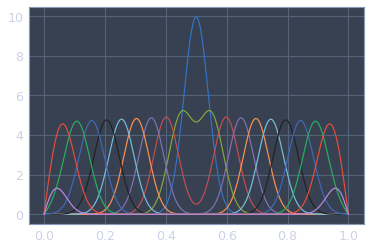

In [52]:
a = .005
h = .1 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, .5 + h, h)
x = np.arange(0, 1 + a, a)
M = len(x)
ndiag_m = np.ones(M-1, float) * ndiag
A = np.diag(ndiag_m, k = 1) + np.diag(ndiag_m, k=-1)
sigma = .04
delta = 1e-6
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    psi2, phi2 = psi, phi
    f1 = psi[1:-1] + h * phi[1:-1]
    f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2 *psi[1:-1])
    psi2[1:-1] = 1 / diag * (f1 - A.dot(psi)[1:-1])
    phi2[1:-1] = 1 / diag * (f2 - A.dot(phi)[1:-1])
    error1, error2 = np.max(np.absolute(psi2 - psi)), np.max(np.absolute(phi2 - phi))
    while error1 > delta:
        psi2 = psi
        f1 = psi[1:-1] + h * phi[1:-1]
        psi2[1:-1] = 1 / diag * (f1 - A.dot(psi)[1:-1])
        error1 = np.max(np.absolute(psi2 - psi))
    while error2 > delta:
        phi2 = phi
        f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2*psi[1:-1])
        phi2[1:-1] = 1 / diag * (f2 - A.dot(phi)[1:-1])
        error2 = np.max(np.absolute(phi2 - phi))
    psis[:,i] = psi2
    phis[:,i] = phi2
for j in range(0,len(ts),100):
    plt.plot(x, psis[:, j])
plt.show()

### e)

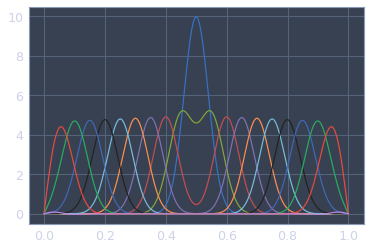

In [56]:
a = .005
h = .1 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, .5 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    f1 = psi[1:-1] + h * phi[1:-1]
    f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2 *psi[1:-1])
    psis[1:-1,i] = LU_tridiag(ndiag, diag, f1)
    phis[1:-1,i] = LU_tridiag(ndiag, diag, f2)
for j in range(0,len(ts),100):
    plt.plot(x, psis[:, j])
plt.show()

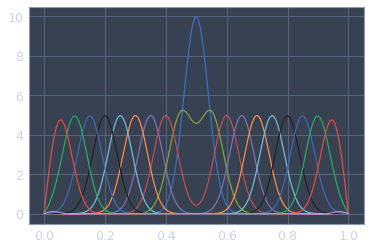

In [58]:
a = .005
h = .01 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, .5 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    f1 = psi[1:-1] + h * phi[1:-1]
    f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2 *psi[1:-1])
    psis[1:-1,i] = LU_tridiag(ndiag, diag, f1)
    phis[1:-1,i] = LU_tridiag(ndiag, diag, f2)
for j in range(0,len(ts),1000):
    plt.plot(x, psis[:, j])
plt.show()

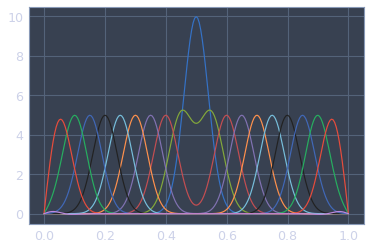

In [59]:
a = .005
h = .001 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, .5 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    f1 = psi[1:-1] + h * phi[1:-1]
    f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2 *psi[1:-1])
    psis[1:-1,i] = LU_tridiag(ndiag, diag, f1)
    phis[1:-1,i] = LU_tridiag(ndiag, diag, f2)
for j in range(0,len(ts),10000):
    plt.plot(x, psis[:, j])
plt.show()

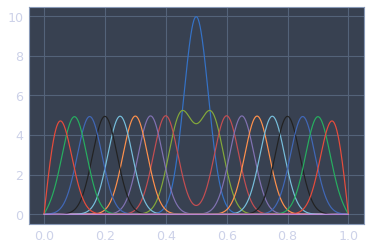

In [63]:
a = .001
h = .1 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, .5 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    f1 = psi[1:-1] + h * phi[1:-1]
    f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2 *psi[1:-1])
    psis[1:-1,i] = LU_tridiag(ndiag, diag, f1)
    phis[1:-1,i] = LU_tridiag(ndiag, diag, f2)
for j in range(0,len(ts),500):
    plt.plot(x, psis[:, j])
plt.show()

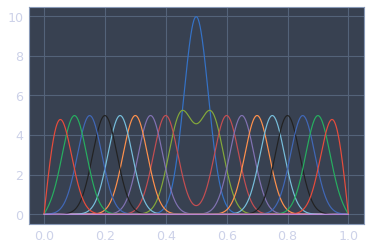

In [64]:
a = .001
h = .01 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, .5 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    f1 = psi[1:-1] + h * phi[1:-1]
    f2 = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] - 2 *psi[1:-1])
    psis[1:-1,i] = LU_tridiag(ndiag, diag, f1)
    phis[1:-1,i] = LU_tridiag(ndiag, diag, f2)
for j in range(0,len(ts),5000):
    plt.plot(x, psis[:, j])
plt.show()

## 2
Implementado o método das diferenças finitas centradas

$$ \psi_{j}^{t+h}-\psi_{j}^{t}=h \phi_{j}^{t+h} $$

$$ \phi_{i}^{t+h}-\phi_{i}^{t}=\frac{c^{2} h}{a^{2}}\left(\psi_{j+1}^{t}+\psi_{j-1}^{t}-2 \psi_{j}^{t}\right) $$

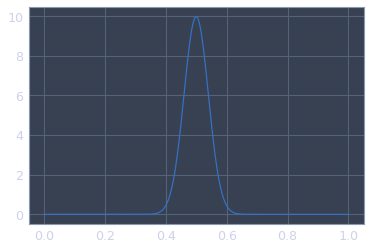

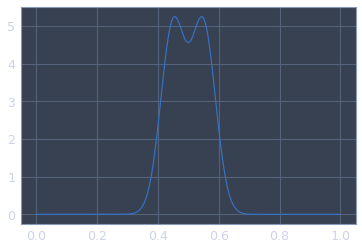

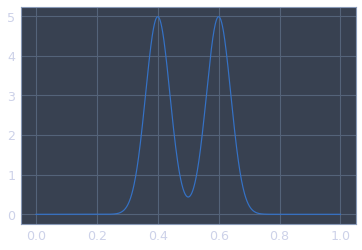

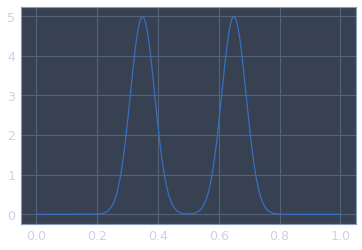

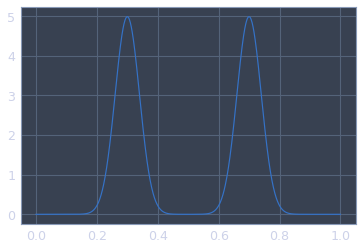

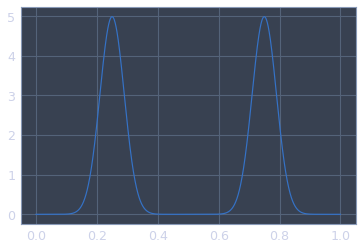

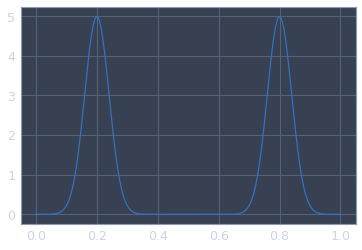

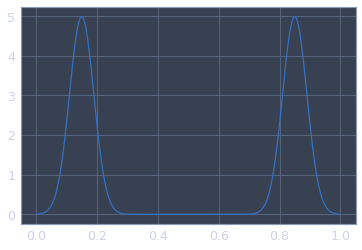

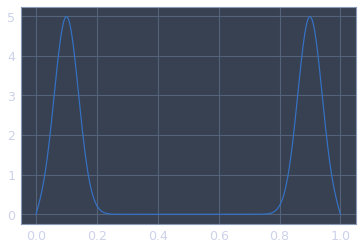

In [28]:
a = .001
h = .1 * a
diag = 1 + 2 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, .4 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    phi[1:-1] = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] -2*psi[1:-1])
    psis[1:-1,i] = psi[1:-1] + h * phi[1:-1]
    phis[:,i] = phi
    psis[0,i], psis[-1, i], phis[0, i], phis[-1,i] = 0., 0., 0., 0.
for j in range(0,len(ts),500):
    plt.plot(x, psis[:, j])
    plt.show()
plt.show()

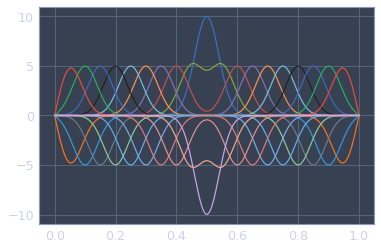

In [53]:
a = .001
h = .1 * a
diag = 1 + .4 * h**2 / a ** 2
ndiag = - h**2 / a ** 2
ts = np.arange(0, 1 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    phi[1:-1] = phi[1:-1] + h/a**2 * (psi[:-2] + psi[2:] -2*psi[1:-1])
    psis[1:-1,i] = psi[1:-1] + h * phi[1:-1]
    phis[:,i] = phi
    psis[0,i], psis[-1, i], phis[0, i], phis[-1,i] = 0., 0., 0., 0.
for j in range(0,len(ts),500):
    plt.plot(x, psis[:, j])
plt.show()

Já pelo método de Crank-Nicolson temos as equações

$$ \phi_i(t+h) - \frac{1}{2} h\psi_i(t+h) = \phi_i(t) + \frac{1}{2} h\psi_i(t) $$

$$ \psi_i(t+h) - \frac{\gamma}{h} \left[ \phi_{i+i}(t+h) + \phi_{i-i}(t+h) -2 \phi_{i}(t+h)        \right] = \psi_i(t) + \frac{\gamma}{h} \left[ \phi_{i+i}(t) + \phi_{i-i}(t) -2 \phi_{i}(t)  \right] $$

Substituíndo como anteriormente, reduzimos o problema a equações da forma

$$ \mathbf{A} \psi(t+h) = \mathbf{b}^\psi $$
$$ \mathbf{A} \phi(t+h) = \mathbf{b}^\phi $$

com $\mathbf{A}$ de tridiagonal de elementos

$$ A_{i,i} = 1 + \frac{\gamma^2}{2} \quad e \quad A_{i-1, j} = A_{i+1, j}= -\frac{\gamma ^2}{4}$$

e

$$ b^\psi_i =\left(1- \frac{\gamma^2}{2} \right)\psi_i(t) + \frac{\gamma^2}{4} \psi_{i+1}(t) + \frac{\gamma^2}{4} \psi_{i-1}(t) + h \phi_i(t)$$

$$ b^\phi_i = \left(1- \frac{\gamma^2}{2} \right) \phi_i(t) + \frac{\gamma^2}{4} \phi_{i+1}(t) + \frac{\gamma^2}{4} \phi_{i-1}(t) - \frac{2\gamma^2}{h} \psi_i(t) + \frac{\gamma^2}{h} \psi_{i+1}(t) + \frac{\gamma^2}{h} \psi_{i-1}(t)$$

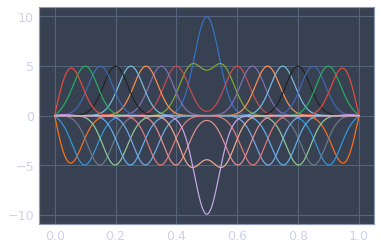

In [51]:
a = .005
h = .1 * a
diag = 1 + (h/a)**2 / 2
ndiag = - (h/2/a) ** 2
ts = np.arange(0, 1 + h, h)
x = np.arange(0, 1 + a, a)
sigma = .04
psis = np.zeros((len(x), len(ts)), float)
phis = np.zeros((len(x), len(ts)), float)
psis[:, 0] = 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-1/2)**2/ 2 / sigma**2)
phis[:, 0] = np.zeros(len(x), float)
for i in range(1, len(ts)):
    psi = psis[:,i-1]
    phi = phis[:,i-1]
    f1 = (1-(h/a)**2/2)*psi[1:-1] + (h/2/a)**2 * (psi[:-2] + psi[2:]) + h * phi[1:-1]
    f2 = (1-(h/a)**2/2)*phi[1:-1] + (h/2/a)**2 * (phi[:-2] + phi[2:]) \
        -(2*h/a**2) *psi[1:-1] + h/a**2 * (psi[:-2] + psi[2:])
    psis[1:-1, i] = LU_tridiag(ndiag, diag, f1)
    phis[1:-1, i] = LU_tridiag(ndiag, diag, f2)
for j in range(0,len(ts), 100):
    plt.plot(x, psis[:, j])
plt.show()